In [0]:
# dataset url = https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, zipfile
%matplotlib inline

Using TensorFlow backend.


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-04 06:38:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.78MB/s    in 39s     

2020-06-04 06:38:43 (7.83 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
file_zip = '/tmp/rockpaperscissors.zip'
zip_isi = zipfile.ZipFile(file_zip, 'r')
zip_isi.extractall('/tmp')
zip_isi.close()

In [0]:
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')

In [6]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/')

['scissors', 'paper', 'rock']

In [0]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    height_shift_range=.2,
                    validation_split=0.2,
                    fill_mode = 'nearest')

In [8]:
direktori_data = '/tmp/rockpaperscissors/rps-cv-images/'
train_data_gen = datagen.flow_from_directory(
    direktori_data,
    target_size = (200,200),
    batch_size=16,
    class_mode = 'categorical',
    shuffle=True,
    subset='training'
)

val_data_gen = datagen.flow_from_directory(
    direktori_data,
    target_size = (200,200),
    batch_size=16,
    class_mode = 'categorical',
    shuffle=False,
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 128)       0

In [11]:
model.fit(
      train_data_gen,
      steps_per_epoch=20, 
      epochs=50,
      validation_data=val_data_gen,
      validation_steps=20, 
      verbose=1)

Epoch 1/50
20/20 [==============================] - 32s 2s/step - loss: 1.4033 - accuracy: 0.2844 - val_loss: 1.1323 - val_accuracy: 0.1031
Epoch 2/50
20/20 [==============================] - 31s 2s/step - loss: 1.1014 - accuracy: 0.3312 - val_loss: 1.1042 - val_accuracy: 0.1031
Epoch 3/50
20/20 [==============================] - 31s 2s/step - loss: 1.0981 - accuracy: 0.3531 - val_loss: 1.1075 - val_accuracy: 0.1031
Epoch 4/50
20/20 [==============================] - 31s 2s/step - loss: 1.0968 - accuracy: 0.3250 - val_loss: 1.1148 - val_accuracy: 0.1969
Epoch 5/50
20/20 [==============================] - 31s 2s/step - loss: 1.0545 - accuracy: 0.4250 - val_loss: 1.2475 - val_accuracy: 0.1750
Epoch 6/50
20/20 [==============================] - 32s 2s/step - loss: 1.0562 - accuracy: 0.4187 - val_loss: 1.0501 - val_accuracy: 0.5125
Epoch 7/50
20/20 [==============================] - 31s 2s/step - loss: 0.9806 - accuracy: 0.5273 - val_loss: 1.0215 - val_accuracy: 0.5281
Epoch 8/50
20/20 [==

Saving gunting.jpg to gunting (1).jpg
[[1. 0. 0.]]


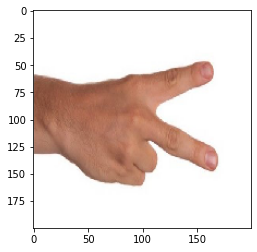

In [13]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes)

  #print(fn)
  #if classes==0:
    #print('clean')
  #else:
    #print('messy')